In [35]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

home = os.path.expanduser('~')
pretrained_loc = os.path.join(home, 'turing', 'overflow-storage', 'c3d.pickle')

pretrained_dict = torch.load(pretrained_loc)

In [18]:
pretrained_dict.keys()
for name, item in pretrained_dict.items():
    print(name, item.size())

conv1.weight torch.Size([64, 3, 3, 3, 3])
conv1.bias torch.Size([64])
conv2.weight torch.Size([128, 64, 3, 3, 3])
conv2.bias torch.Size([128])
conv3a.weight torch.Size([256, 128, 3, 3, 3])
conv3a.bias torch.Size([256])
conv3b.weight torch.Size([256, 256, 3, 3, 3])
conv3b.bias torch.Size([256])
conv4a.weight torch.Size([512, 256, 3, 3, 3])
conv4a.bias torch.Size([512])
conv4b.weight torch.Size([512, 512, 3, 3, 3])
conv4b.bias torch.Size([512])
conv5a.weight torch.Size([512, 512, 3, 3, 3])
conv5a.bias torch.Size([512])
conv5b.weight torch.Size([512, 512, 3, 3, 3])
conv5b.bias torch.Size([512])
fc6.weight torch.Size([4096, 8192])
fc6.bias torch.Size([4096])
fc7.weight torch.Size([4096, 4096])
fc7.bias torch.Size([4096])
fc8.weight torch.Size([487, 4096])
fc8.bias torch.Size([487])


In [26]:
import torch.nn as nn

model = nn.Sequential(nn.Conv3d(64, 128, kernel_size=(3,3,3), padding=(1,1,1)))
for name, item in model.state_dict().items():
    print(name, item.size())

0.weight torch.Size([128, 64, 3, 3, 3])
0.bias torch.Size([128])


In [68]:
def load_file():
    hdf = h5py.File(loc, mode='r', libver='latest', swmr=True)
    return hdf

['train', 'val']
[[0.2217025 0.2217025 0.2217025 ... 0.2217025 0.2217025 0.2217025]
 [0.2217025 0.2217025 0.2217025 ... 0.2217025 0.2217025 0.2217025]
 [0.2217025 0.2217025 0.2217025 ... 0.2217025 0.2217025 0.2217025]
 ...
 [5.118864  5.118864  5.118864  ... 7.711479  7.711479  7.711479 ]
 [5.118864  5.118864  5.118864  ... 7.711479  7.711479  7.711479 ]
 [5.118864  5.118864  5.118864  ... 7.711479  7.711479  7.711479 ]]


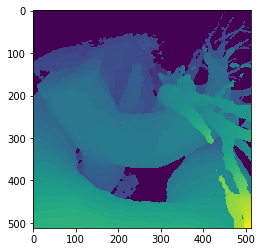

In [75]:
output_dir = '/users/pgrad/martins7/turing/overflow-storage/lf_volume_sets'
hdf5_name = 'lf_set.h5'
loc = os.path.join(output_dir, hdf5_name)
hdf = load_file()
print(list(hdf.keys()))
plt.imshow((hdf['val']['disparity']['images'][2,0,:,:,0]))
#plt.imshow((hdf['val']['colour']['images'][2,0,:,:,:]))
print(hdf['val']['disparity']['images'][2, 0, :, :, 0])
hdf.close()

In [92]:
from PIL import Image
dir1 = '/users/pgrad/martins7/turing/overflow-storage/lf_volume_sets/warped'
im1 = Image.open(os.path.join(dir1, 'Colour40.png'))
im1.load()
data1 = np.asarray(im1)
dir2 = '/users/pgrad/martins7/turing/overflow-storage/lf_volume_sets/val/0003'
im2 = Image.open(os.path.join(dir2, 'Colour40.png'))
im2.load()
data2 = np.asarray(im2)[:, :, :3]
print(data1)
print('1')
print(data2)
print('2')
print(abs(data1 - data2))
print('3')
print(np.subtract(data1, data2))
print('4')

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  34  30]
  [ 40  33  28]
  [ 40  33  29]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  34  29]
  [ 40  33  28]
  [ 39  32  27]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 41  33  29]
  [ 40  33  29]
  [ 39  32  28]]

 ...

 [[111  79  58]
  [111  79  58]
  [112  80  59]
  ...
  [ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]]

 [[108  77  57]
  [110  78  57]
  [110  79  58]
  ...
  [ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]]

 [[108  78  58]
  [109  78  57]
  [110  79  59]
  ...
  [ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]]]
1
[[[141  92  66]
  [142  92  66]
  [141  89  63]
  ...
  [ 40  34  29]
  [ 39  33  29]
  [ 39  33  29]]

 [[145  96  70]
  [147  96  70]
  [147  95  68]
  ...
  [ 40  34  29]
  [ 39  33  29]
  [ 40  34  30]]

 [[146  98  72]
  [149  98  72]
  [150  98  71]
  ...
  [ 40  33  29]
  [ 39  33  30]
  [ 41  35  31]]

 ...

 [[110  78  57]
  [108  77  57]
  [106  76  57]
  